# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spambase.csv')

In [3]:
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [5]:
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


# Cleaning DataSet

In [6]:
df.isnull().sum()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.43      0
0.778     0
0.44      0
0.45      0
3.756     0
61        0
278       0
1         0
dtype: int64

In [124]:
#Drop duplicates
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


In [7]:
#df.groupby('Sex')['Age'].mean()

In [8]:
#df['Age']=df.groupby("Sex")['Age'].transform(lambda x: x.fillna(x.mean()))

# Changing category column to numerical column

In [9]:
#from sklearn.preprocessing import LabelEncoder

In [10]:
#le = LabelEncoder()

In [11]:
# Task 1: Transform the categorical 'Sex' attribute to a numerical format
#df['Sex'] = le.fit_transform(df['Sex'])

In [12]:
#df.head()

# Doing train_test_spliting

In [14]:
from sklearn.model_selection import train_test_split

In [54]:
# Task 2: Split the data considering the testing corpus as 30% and random state to 101.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

# Training the model

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
clf = DecisionTreeClassifier(random_state=5,criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=5)

# Checking accuracy of testing dataset

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
predictions_test=clf.predict(X_test)
# Task 3: Calculate the accuracy of the testing data
accuracy = accuracy_score(y_test, predictions_test)
accuracy

0.9260869565217391

# Checking accuracy of training dataset

In [121]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train,predictions_train)

0.9991847826086957

#### Here we can clearly see that for training dataset our accuracy is very high whereas for test dataset it is very low,hence our model is overfitted and to avoid this we will use Pruning method later.

# Evaluating our test dataset

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(y_test,predictions_test))
# Task 4: Generate the confusion matrix for evaluating the testing corpus
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions_test)
print(cm)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       538
           1       0.87      0.90      0.88       382

    accuracy                           0.90       920
   macro avg       0.90      0.90      0.90       920
weighted avg       0.90      0.90      0.90       920

[[487  51]
 [ 39 343]]


# Evaluating our training dataset

In [19]:
print(classification_report(y_train,predictions_train))
# Task 5: Generate the confusion matrix for evaluating the training corpus
# Generate confusion matrix
cm_train = confusion_matrix(y_train, predictions_train)
print("Confusion Matrix for Training Data:")
print(cm_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2250
           1       1.00      1.00      1.00      1430

    accuracy                           1.00      3680
   macro avg       1.00      1.00      1.00      3680
weighted avg       1.00      1.00      1.00      3680

Confusion Matrix for Training Data:
[[2250    0]
 [   3 1427]]


# Finding false positive rate and true positive rate

In [20]:
from sklearn.metrics import roc_curve,auc

In [21]:
dt_probs = clf.predict_proba(X_test)[:,1]

In [22]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test,dt_probs)

# Plotting *ROC* curve for our Decision Tree

In [23]:
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt

0.9026450495338562

In [24]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,8))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

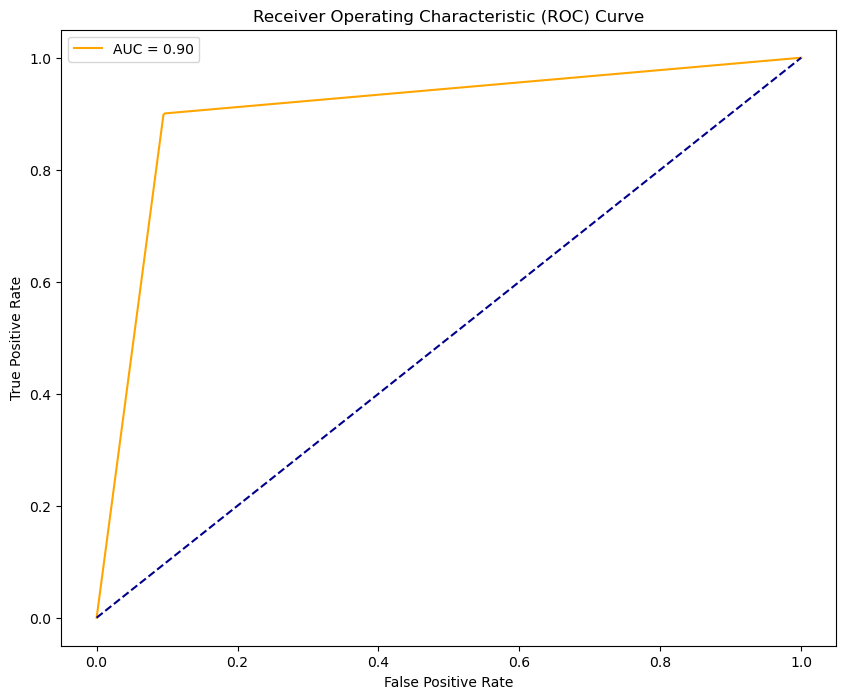

In [25]:
plot_roc_curve(fpr_dt,tpr_dt)

# Pruning of our decision tree

In [26]:
# Task 6: Obtain the corresponding total leaf impurities at each step of the pruning process
path = clf.cost_complexity_pruning_path(X_train, y_train) #pruning path
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Visualizing alpha w.r.t impurity of leaves

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

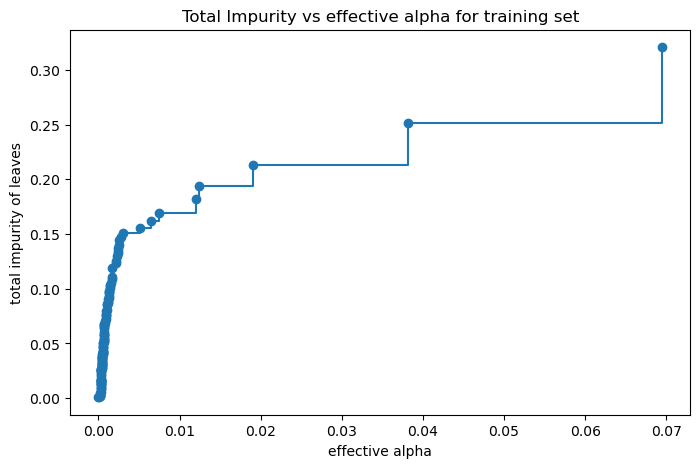

In [27]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [28]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15455982400900858


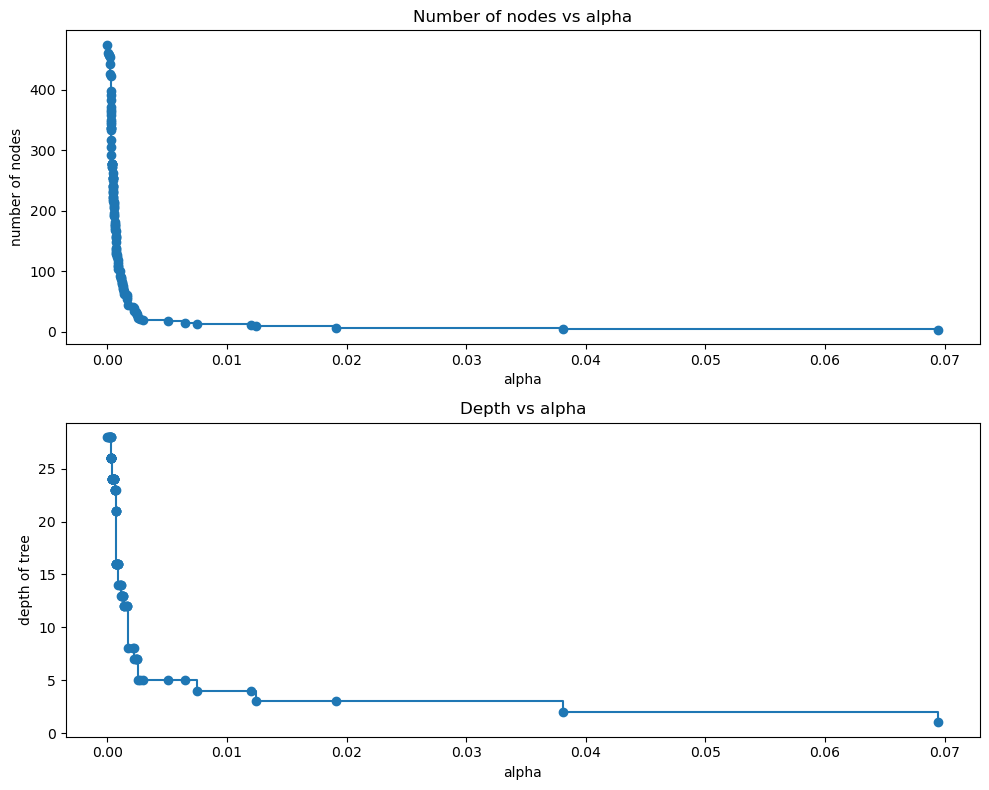

In [29]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

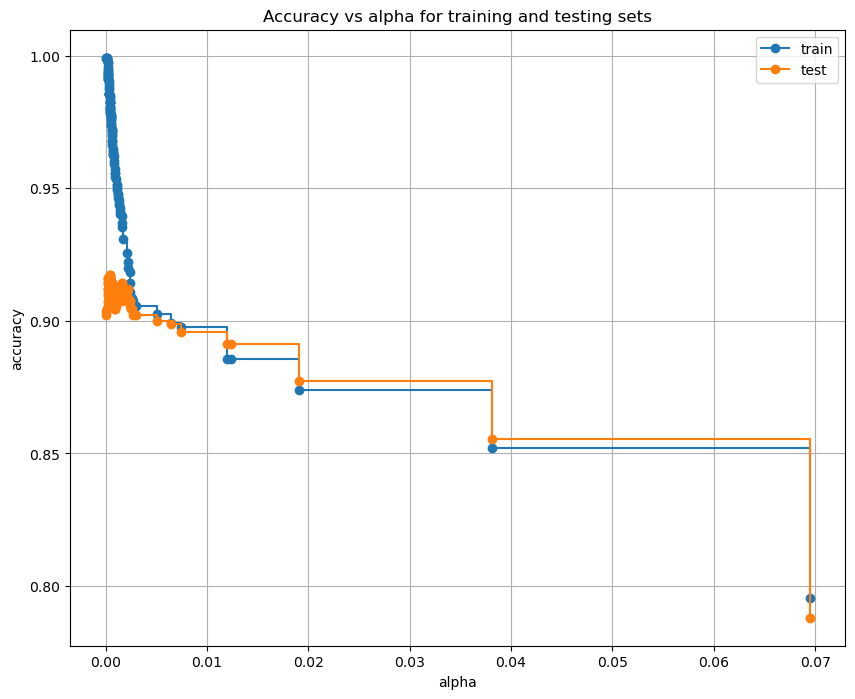

In [30]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

# Accuracy after pruning

In [31]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

### Accuracy of test dataset

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.8913043478260869

### Accuracy of training dataset

In [34]:
pred_1 = clf.predict(X_train)
accuracy_score(y_train,pred_1)

0.8855978260869565

# Visualizing after pruning

[Text(0.5555555555555556, 0.875, 'X[52] <= 0.056\ngini = 0.475\nsamples = 3680\nvalue = [2250, 1430]'),
 Text(0.3333333333333333, 0.625, 'X[6] <= 0.055\ngini = 0.357\nsamples = 2797\nvalue = [2147, 650]'),
 Text(0.2222222222222222, 0.375, 'X[51] <= 0.508\ngini = 0.275\nsamples = 2539\nvalue = [2122, 417]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.193\nsamples = 2278\nvalue = [2032, 246]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.452\nsamples = 261\nvalue = [90, 171]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.175\nsamples = 258\nvalue = [25, 233]'),
 Text(0.7777777777777778, 0.625, 'X[24] <= 0.4\ngini = 0.206\nsamples = 883\nvalue = [103, 780]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.122\nsamples = 828\nvalue = [54, 774]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.194\nsamples = 55\nvalue = [49, 6]')]

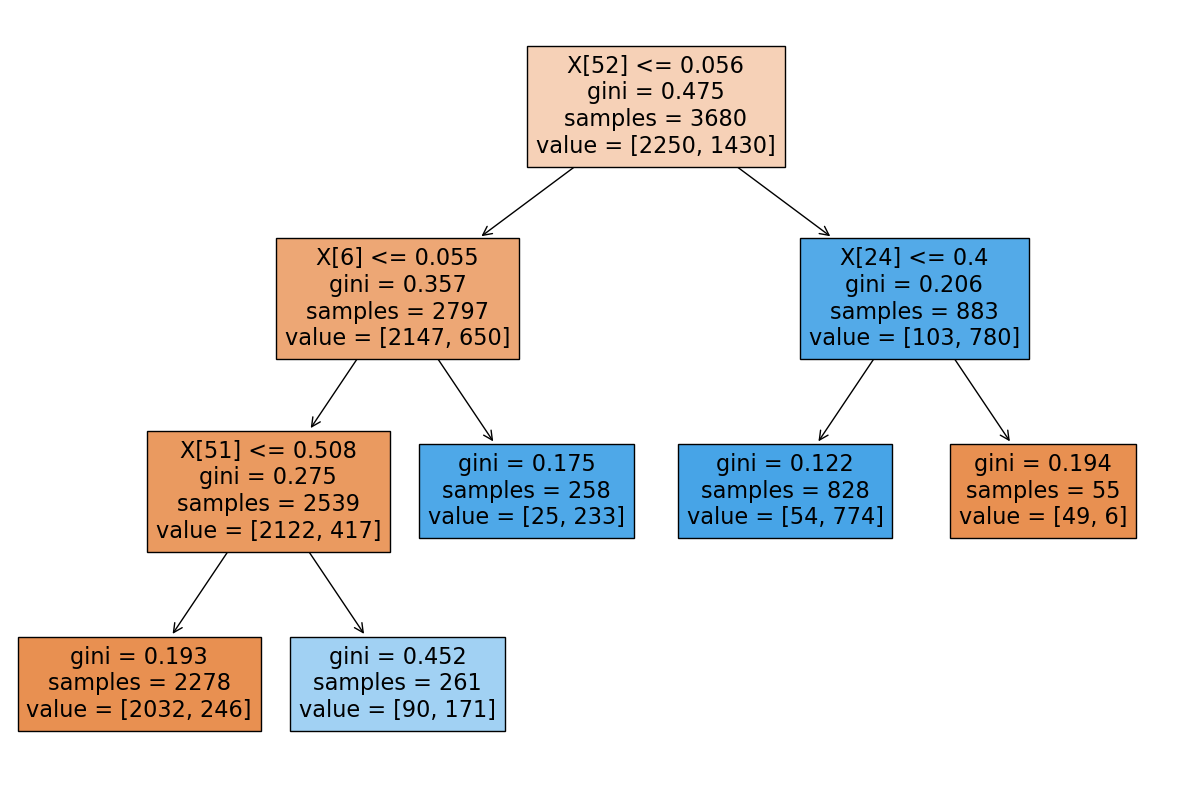

In [35]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)